#[실루엣 계수(Silhouette Coefficient)](https://)
- [각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구함](https://)
- [군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 지표](https://)

- 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있음
- 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있음
>- 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현됨

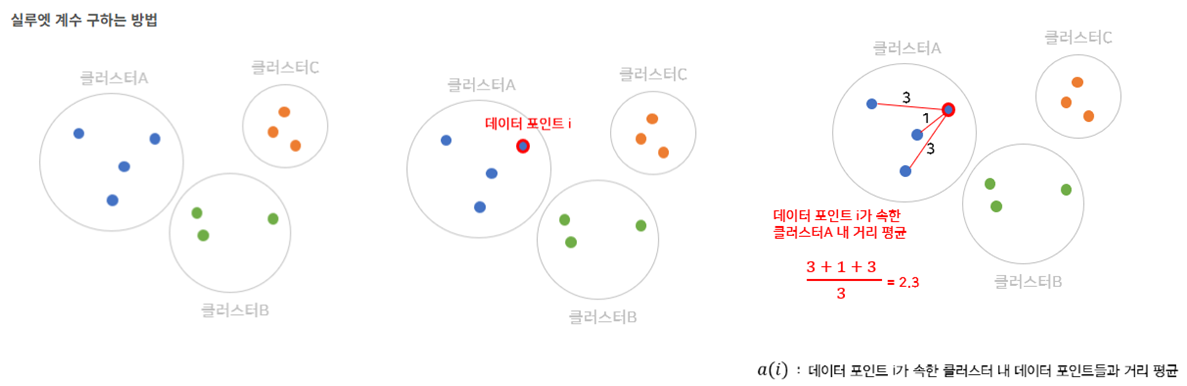

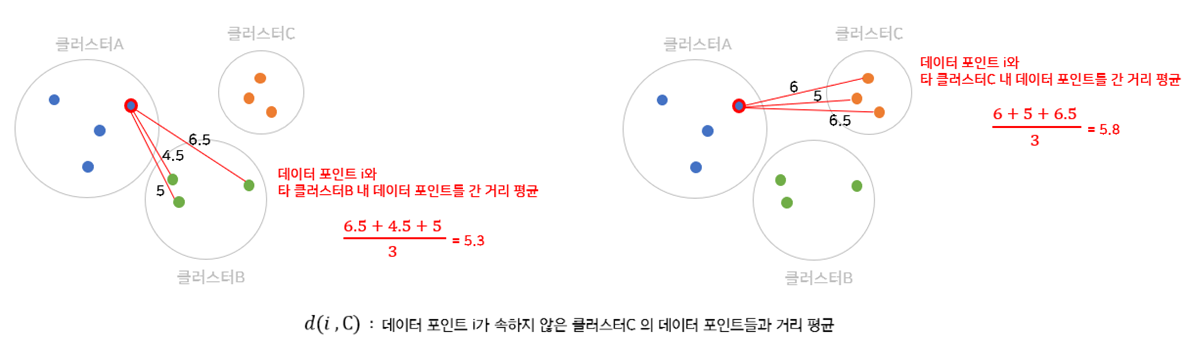

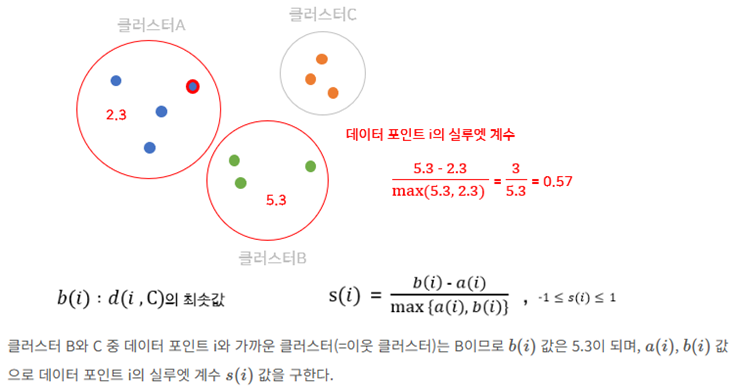

In [1]:
#실루엣 계수는 각각의 데이터가 해당 데이터와 같은 군집 내의 데이터와는 얼마나 가깝게 군집화가 되었고,
#다른 군집에 있는 데이터와는 얼마나 멀리 분포되어 있는지를 나타내는 지표이다.
#실루엣 계수가 가질 수 있는 값은 -1~1이며, 1에 가까울수록 군집화가 잘 되었음을 의미한다.
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


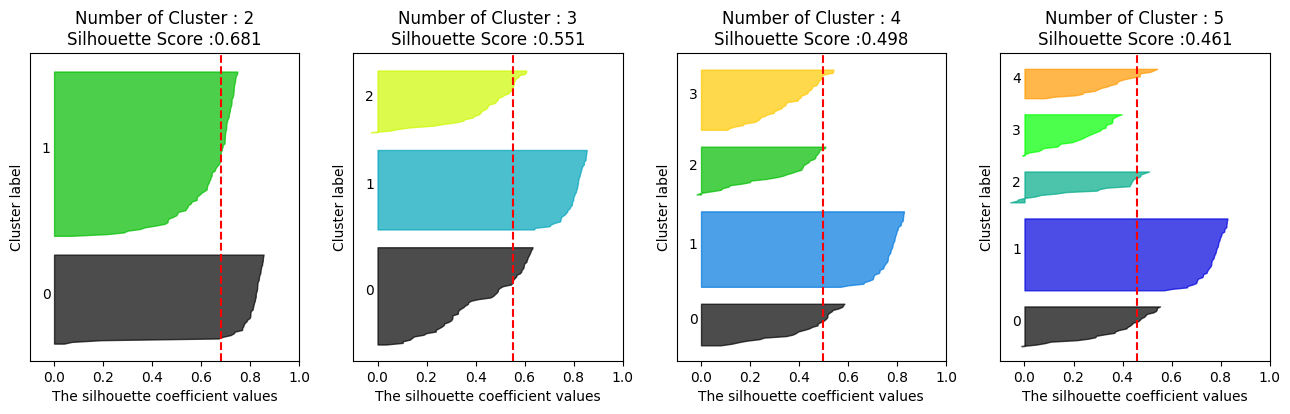

In [2]:
# 데이터 하나에 대한 실루엣 계수만 좋다고 군집화가 잘 이루어졌다고 일반화를 할 수 없다.
#각 군집별 데이터의 수가 고르게 분포되어야 하며, 각 군집별 실루엣 계수 평균값이
#전체 실루엣 계수 평균값에 크게 벗어나지 않는 것이 중요하다.
from sklearn.datasets import load_iris

iris = load_iris() #군집의 갯수별로 붓꽃 데이터의 실루엣 계수를 시각화한 것
visualize_silhouette([2, 3, 4, 5], iris.data)
#결과는 군집별로 실루엣 계수를 시각화한 예시이다.
#빨간 점선은 전체 실루엣 계수의 평균을 의미한다.
#군집 갯수 = 2, 평균 실루엣 계수 0.705
#군집별 실루엣 계수 평균값이 0보다 크고 편차가 크지 않지만, 두 군집의 데이터 수의 차이가 많다.
#군집 갯수 = 3, 평균 실루엣 계수 0.588
#2번 군집에 실루엣 계수가 음수인 데이터들이 존재한다. 이는 2번 군집의 실루엣 계수와 전체 실루엣 계수에 편차가 큰 것을 의미한다.
#군집 갯수 = 4, 평균 실루엣 계수 0.651
#모든 군집의 데이터 수의 비율이 고른 편이고, 실루엣 계수가 음수인 데이터들도 존재하지 않으므로 최적의 군집화 결과로 판단된다.

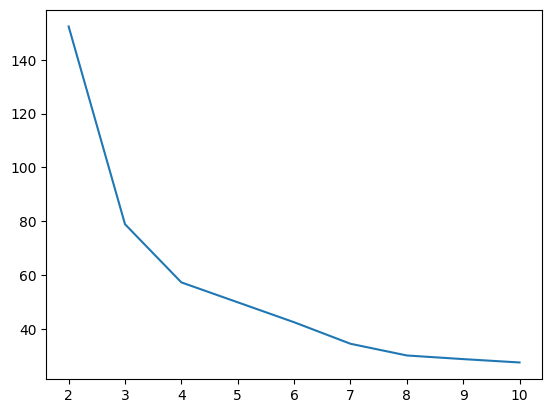

In [3]:
import seaborn as sns

def visualize_inertia(cluster_lists, X_features):
    inertias = []
    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)

    sns.lineplot(x=cluster_lists, y=inertias)
visualize_inertia([i for i in range(2, 11)], iris.data)
#특정 군집 이상으로 갯수를 늘려도 inertia가 감소하는 속도가 줄어드는 시점이 있다. (위 그림에서는 3 혹은 4가 될 것이다.)
#이후로는 이미 0에 수렴해가고 있기 때문에 큰 의미가 없다.
#이렇게 꺾이는 모양때문에 inertia를 통한 방법은 elbow method라고도 불린다.



---



#<<<참조자료 사이트>>>
1.[클러스터링 평가지표 - 실루엣 계수](https://studying-haeung.tistory.com/10)  
2.[군집화 평가 지표 (실루엣 계수, 응집도)](https://dev-ryuon.tistory.com/83)  
3.[군집 평가 (Cluster Evaluation)](https://atonlee.tistory.com/145)  
4.[클러스터링 평가지표 - 실루엣 계수](https://velog.io/@jochedda/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-%ED%8F%89%EA%B0%80%EC%A7%80%ED%91%9C-%EC%8B%A4%EB%A3%A8%EC%97%A3-%EA%B3%84%EC%88%98Silhouette-Coefficient)  
5.[클러스터링(군집화) 평가지표 Silhouette(실루엣) 지수(계수)에 대해서 알아보자](https://zephyrus1111.tistory.com/193)  
6.[군집화 - 실루엣 분석](https://velog.io/@gangjoo/ML-%EA%B5%B0%EC%A7%91%ED%99%94-%EC%8B%A4%EB%A3%A8%EC%97%A3-%EB%B6%84%EC%84%9D-Silhouette-Analysis)